# Microdados ENEM parte 3

In [1]:
import pandas as pd

In [2]:
microdadosEnem = pd.read_csv(r"C:\Users\brnam\OneDrive\Área de Trabalho\analise-dados\projetos\enem\microdados_enem2018\DADOS\MICRODADOS_ENEM_2018.csv", sep=";", encoding="ISO-8859-1", nrows = 100000)
microdadosEnem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.0,M,1.0,1,...,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,...,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,...,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.0,F,0.0,3,...,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,...,A,B,A,A,B,A,B,B,B,A


In [3]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [4]:
colunasSelecionadas = ['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO', 'Q001', 'Q002']

In [5]:
microdadosEnemSelecionado = microdadosEnem.filter(items = colunasSelecionadas)

In [6]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,180008202043,NaN,NaN,A,A
1,180007197856,480.3,280.0,B,B
2,180008517434,NaN,NaN,E,E
3,180007661228,NaN,NaN,B,C
4,180008787987,NaN,360.0,C,E


In [7]:
microdadosEnemSelecionado = microdadosEnemSelecionado.dropna()

In [8]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
1,180007197856,480.3,280.0,B,B
5,180007239581,538.8,580.0,C,D
7,180008090447,733.8,680.0,A,E
8,180008257068,459.0,340.0,D,D
9,180008202044,525.4,740.0,C,C


In [9]:
q001e002Dicionario = {'A': 'Nunca estudou',
'B': 'Não completou a 4ª série/5º ano do ensino fundamental',
'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do ensino fundamental',
'D': 'Completou a 8ª série/9º ano do ensino fundamental, mas não completou o Ensino Médio',
'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
'G': 'Completou a Pós-graduação',
'H': 'Não sei'}

In [10]:
microdadosEnemSelecionado.filter(items= ['Q001', 'NU_INSCRICAO']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,3944
B,17346
C,10572
D,8788
E,18927
F,4480
G,2303
H,6576


In [11]:
microdadosEnemSelecionado['NO_Q001'] = [q001e002Dicionario[resp] for resp in microdadosEnemSelecionado.Q001]

In [12]:
q001e002Dicionario['B']

'Não completou a 4ª série/5º ano do ensino fundamental'

In [13]:
microdadosEnemSelecionado.Q001

1        B
5        C
7        A
8        D
9        C
        ..
99994    E
99995    B
99996    E
99997    F
99999    E
Name: Q001, Length: 72936, dtype: object

In [14]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001
1,180007197856,480.3,280.0,B,B,Não completou a 4ª série/5º ano do ensino fund...
5,180007239581,538.8,580.0,C,D,"Completou a 4ª série/5º ano, mas não completou..."
7,180008090447,733.8,680.0,A,E,Nunca estudou
8,180008257068,459.0,340.0,D,D,Completou a 8ª série/9º ano do ensino fundamen...
9,180008202044,525.4,740.0,C,C,"Completou a 4ª série/5º ano, mas não completou..."


In [15]:
microdadosEnemSelecionado['NO_Q002'] = [q001e002Dicionario[resp] for resp in microdadosEnemSelecionado.Q002]

In [16]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
1,180007197856,480.3,280.0,B,B,Não completou a 4ª série/5º ano do ensino fund...,Não completou a 4ª série/5º ano do ensino fund...
5,180007239581,538.8,580.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do ensino fundamen...
7,180008090447,733.8,680.0,A,E,Nunca estudou,"Completou o Ensino Médio, mas não completou a ..."
8,180008257068,459.0,340.0,D,D,Completou a 8ª série/9º ano do ensino fundamen...,Completou a 8ª série/9º ano do ensino fundamen...
9,180008202044,525.4,740.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."


In [17]:
microdadosEnemSelecionado.filter(items= ['NO_Q001', 'NU_INSCRICAO']).groupby('NO_Q001').count()

,NU_INSCRICAO
NO_Q001,
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do ensino fundamental",10572
"Completou a 8ª série/9º ano do ensino fundamental, mas não completou o Ensino Médio",8788
"Completou a Faculdade, mas não completou a Pós-graduação",4480
Completou a Pós-graduação,2303
"Completou o Ensino Médio, mas não completou a Faculdade",18927
Nunca estudou,3944
Não completou a 4ª série/5º ano do ensino fundamental,17346
Não sei,6576


In [18]:
microdadosEnemSelecionado.filter(items= ['NO_Q001', 'NU_INSCRICAO']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending =False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",18927
Não completou a 4ª série/5º ano do ensino fundamental,17346
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do ensino fundamental",10572
"Completou a 8ª série/9º ano do ensino fundamental, mas não completou o Ensino Médio",8788
Não sei,6576
"Completou a Faculdade, mas não completou a Pós-graduação",4480
Nunca estudou,3944
Completou a Pós-graduação,2303


In [19]:
microdadosEnemSelecionado.filter(items= ['NO_Q002', 'NU_INSCRICAO']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending =False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",24257
Não completou a 4ª série/5º ano do ensino fundamental,13141
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do ensino fundamental",10334
"Completou a 8ª série/9º ano do ensino fundamental, mas não completou o Ensino Médio",10314
"Completou a Faculdade, mas não completou a Pós-graduação",6365
Completou a Pós-graduação,4129
Nunca estudou,2569
Não sei,1827


In [20]:
microdadosEnemSelecionado.filter(items= ['NO_Q001', 'NU_NOTA_MT']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending =False)

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação,639.180156
"Completou a Faculdade, mas não completou a Pós-graduação",611.642567
"Completou o Ensino Médio, mas não completou a Faculdade",552.262239
"Completou a 8ª série/9º ano do ensino fundamental, mas não completou o Ensino Médio",535.420721
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do ensino fundamental",525.566487
Não sei,518.210310
Não completou a 4ª série/5º ano do ensino fundamental,508.967041
Nunca estudou,493.972972


In [21]:
microdadosEnemSelecionado.filter(items= ['NO_Q002', 'NU_NOTA_MT']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending =False)

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação,615.229935
"Completou a Faculdade, mas não completou a Pós-graduação",594.896339
"Completou o Ensino Médio, mas não completou a Faculdade",544.250810
"Completou a 8ª série/9º ano do ensino fundamental, mas não completou o Ensino Médio",524.653481
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do ensino fundamental",519.275140
Não sei,509.101642
Não completou a 4ª série/5º ano do ensino fundamental,503.694437
Nunca estudou,488.755469


In [22]:
microdadosEnemSelecionado.filter(items= ['NO_Q002', 'NU_NOTA_REDACAO']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending =False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,661.162509
"Completou a Faculdade, mas não completou a Pós-graduação",630.667714
"Completou o Ensino Médio, mas não completou a Faculdade",562.115678
"Completou a 8ª série/9º ano do ensino fundamental, mas não completou o Ensino Médio",528.720186
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do ensino fundamental",513.439133
Não completou a 4ª série/5º ano do ensino fundamental,488.754280
Não sei,481.269841
Nunca estudou,460.700662


In [23]:
microdadosEnemSelecionado.filter(items= ['NO_Q001', 'NU_NOTA_REDACAO']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending =False)

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação,688.241424
"Completou a Faculdade, mas não completou a Pós-graduação",651.062500
"Completou o Ensino Médio, mas não completou a Faculdade",573.471760
"Completou a 8ª série/9º ano do ensino fundamental, mas não completou o Ensino Médio",547.451070
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do ensino fundamental",527.786606
Não sei,512.013382
Não completou a 4ª série/5º ano do ensino fundamental,499.078750
Nunca estudou,469.918864


In [24]:
microdadosEnemSelecionado.filter(items= ['NO_Q001', 'NU_NOTA_REDACAO']).groupby('NO_Q001').describe()

NU_NOTA_REDACAO  \
                                                             count   
NO_Q001                                                              
Completou a 4ª série/5º ano, mas não completou ...         10572.0   
Completou a 8ª série/9º ano do ensino fundament...          8788.0   
Completou a Faculdade, mas não completou a Pós-...          4480.0   
Completou a Pós-graduação                                   2303.0   
Completou o Ensino Médio, mas não completou a F...         18927.0   
Nunca estudou                                               3944.0   
Não completou a 4ª série/5º ano do ensino funda...         17346.0   
Não sei                                                     6576.0   

                                                                            \
                                                          mean         std   
NO_Q001                                                                      
Completou a 4ª série/5º ano, mas não completou ...  527.786606  180.669617   
Completou a 8ª série/9º ano do ensino fundament...  547.451070  181.877749   
Completou a Faculdade, mas não completou a Pós-...  651.062500  185.486659   
Completou a Pós-graduação                           688.241424  184.410651   
Completou o Ensino Médio, mas não completou a F...  573.471760  185.836398   
Nunca estudou                                       469.918864  174.158587   
Não completou a 4ª série/5º ano do ensino funda...  499.078750  171.983105   
Não sei                                             512.013382  180.169647   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q001                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  380.0  540.0  640.0   
Completou a 8ª série/9º ano do ensino fundament...  0.0  400.0  560.0  660.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  540.0  660.0  800.0   
Completou a Pós-graduação                           0.0  580.0  700.0  840.0   
Completou o Ensino Médio, mas não completou a F...  0.0  440.0  580.0  700.0   
Nunca estudou                                       0.0  340.0  480.0  580.0   
Não completou a 4ª série/5º ano do ensino funda...  0.0  360.0  520.0  600.0   
Não sei                                             0.0  360.0  520.0  620.0   

                                                           
                                                      max  
NO_Q001                                                    
Completou a 4ª série/5º ano, mas não completou ...  980.0  
Completou a 8ª série/9º ano do ensino fundament...  980.0  
Completou a Faculdade, mas não completou a Pós-...  980.0  
Completou a Pós-graduação                           980.0  
Completou o Ensino Médio, mas não completou a F...  980.0  
Nunca estudou                                       960.0  
Não completou a 4ª série/5º ano do ensino funda...  980.0  
Não sei                                             980.0

In [25]:
microdadosEnemSelecionado.filter(items= ['NO_Q002', 'NU_NOTA_REDACAO']).groupby('NO_Q002').describe()

NU_NOTA_REDACAO  \
                                                             count   
NO_Q002                                                              
Completou a 4ª série/5º ano, mas não completou ...         10334.0   
Completou a 8ª série/9º ano do ensino fundament...         10314.0   
Completou a Faculdade, mas não completou a Pós-...          6365.0   
Completou a Pós-graduação                                   4129.0   
Completou o Ensino Médio, mas não completou a F...         24257.0   
Nunca estudou                                               2569.0   
Não completou a 4ª série/5º ano do ensino funda...         13141.0   
Não sei                                                     1827.0   

                                                                            \
                                                          mean         std   
NO_Q002                                                                      
Completou a 4ª série/5º ano, mas não completou ...  513.439133  177.391656   
Completou a 8ª série/9º ano do ensino fundament...  528.720186  179.018112   
Completou a Faculdade, mas não completou a Pós-...  630.667714  187.883470   
Completou a Pós-graduação                           661.162509  192.591479   
Completou o Ensino Médio, mas não completou a F...  562.115678  182.230779   
Nunca estudou                                       460.700662  170.827584   
Não completou a 4ª série/5º ano do ensino funda...  488.754280  171.213439   
Não sei                                             481.269841  182.879868   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q002                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  360.0  520.0  620.0   
Completou a 8ª série/9º ano do ensino fundament...  0.0  380.0  540.0  640.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  520.0  640.0  780.0   
Completou a Pós-graduação                           0.0  540.0  680.0  820.0   
Completou o Ensino Médio, mas não completou a F...  0.0  420.0  560.0  680.0   
Nunca estudou                                       0.0  340.0  460.0  560.0   
Não completou a 4ª série/5º ano do ensino funda...  0.0  360.0  500.0  600.0   
Não sei                                             0.0  340.0  480.0  600.0   

                                                           
                                                      max  
NO_Q002                                                    
Completou a 4ª série/5º ano, mas não completou ...  980.0  
Completou a 8ª série/9º ano do ensino fundament...  980.0  
Completou a Faculdade, mas não completou a Pós-...  980.0  
Completou a Pós-graduação                           980.0  
Completou o Ensino Médio, mas não completou a F...  980.0  
Nunca estudou                                       980.0  
Não completou a 4ª série/5º ano do ensino funda...  980.0  
Não sei                                             980.0

In [26]:
colunasSelecionadas = ['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [27]:
microdadosEnemSelecionado['SG_UF_RESIDENCIA'] = microdadosEnem.SG_UF_RESIDENCIA

In [28]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002,SG_UF_RESIDENCIA
1,180007197856,480.3,280.0,B,B,Não completou a 4ª série/5º ano do ensino fund...,Não completou a 4ª série/5º ano do ensino fund...,MA
5,180007239581,538.8,580.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do ensino fundamen...,PB
7,180008090447,733.8,680.0,A,E,Nunca estudou,"Completou o Ensino Médio, mas não completou a ...",PI
8,180008257068,459.0,340.0,D,D,Completou a 8ª série/9º ano do ensino fundamen...,Completou a 8ª série/9º ano do ensino fundamen...,CE
9,180008202044,525.4,740.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou...",MT


In [29]:
microdadosEnemSelecionado.filter(items= ['NO_Q002', 'NU_NOTA_REDACAO'])\
                                .where(microdadosEnemSelecionado.SG_UF_RESIDENCIA == 'RJ')\
                                .groupby('NO_Q002')\
                                .mean().sort_values(by='NU_NOTA_REDACAO', ascending =False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,716.608187
"Completou a Faculdade, mas não completou a Pós-graduação",677.485714
"Completou o Ensino Médio, mas não completou a Faculdade",572.844660
"Completou a 8ª série/9º ano do ensino fundamental, mas não completou o Ensino Médio",526.218097
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do ensino fundamental",506.404199
Não completou a 4ª série/5º ano do ensino fundamental,495.084746
Nunca estudou,468.387097
Não sei,456.556291


In [30]:
microdadosEnemSelecionado.filter(items= ['NO_Q002', 'NU_NOTA_REDACAO'])\
                                .where(microdadosEnemSelecionado.SG_UF_RESIDENCIA == 'CE')\
                                .groupby('NO_Q002')\
                                .mean().sort_values(by='NU_NOTA_REDACAO', ascending =False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,683.000000
"Completou a Faculdade, mas não completou a Pós-graduação",656.363636
"Completou o Ensino Médio, mas não completou a Faculdade",581.513241
"Completou a 8ª série/9º ano do ensino fundamental, mas não completou o Ensino Médio",534.802495
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do ensino fundamental",520.427350
Não completou a 4ª série/5º ano do ensino fundamental,498.766067
Não sei,472.455516
Nunca estudou,471.452991


In [31]:
microdadosEnemSelecionado.filter(items= ['SG_UF_RESIDENCIA', 'NO_Q002', 'NU_NOTA_REDACAO'])\
                                .groupby(['SG_UF_RESIDENCIA', 'NO_Q002'])\
                                .mean()

NU_NOTA_REDACAO
SG_UF_RESIDENCIA NO_Q002                                                            
AC               Completou a 4ª série/5º ano, mas não completou ...       486.382979
                 Completou a 8ª série/9º ano do ensino fundament...       547.058824
                 Completou a Faculdade, mas não completou a Pós-...       558.378378
                 Completou a Pós-graduação                                554.545455
                 Completou o Ensino Médio, mas não completou a F...       503.617021
...                                                                              ...
TO               Completou a Pós-graduação                                605.555556
                 Completou o Ensino Médio, mas não completou a F...       509.915966
                 Nunca estudou                                            419.230769
                 Não completou a 4ª série/5º ano do ensino funda...       453.904762
                 Não sei                                                  479.090909

[216 rows x 1 columns]

In [32]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='SG_UF_RESIDENCIA'>

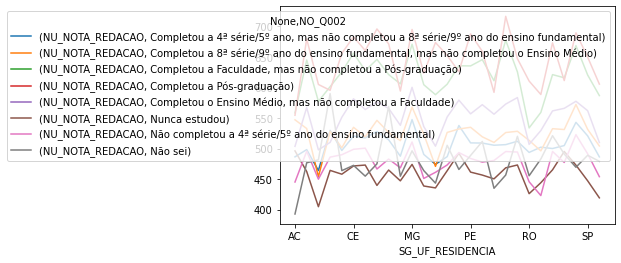

In [33]:
microdadosEnemSelecionado.filter(items= ['SG_UF_RESIDENCIA', 'NO_Q002', 'NU_NOTA_REDACAO']).groupby(['SG_UF_RESIDENCIA', 'NO_Q002']).mean().sort_values(by='NU_NOTA_REDACAO', ascending=False).unstack().plot()

Text(0.02, 0.65, 'A : Nunca estudou\nB : Não completou a 4ª série/5º ano do ensino fundamental\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do ensino fundamental\nD : Completou a 8ª série/9º ano do ensino fundamental, mas não completou o Ensino Médio\nE : Completou o Ensino Médio, mas não completou a Faculdade\nF : Completou a Faculdade, mas não completou a Pós-graduação\nG : Completou a Pós-graduação\nH : Não sei\n')

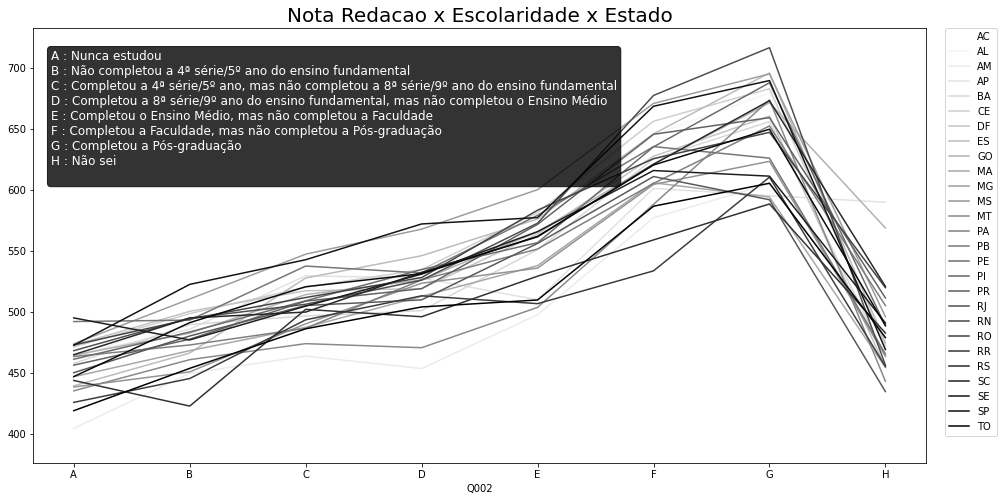

In [87]:
#fig, ax = plt.subplots(figsize=(20,10)) 
#plt.suptitle('Nota Redacao x Escolaridade x Estado') 

ax = microdadosEnemSelecionado.filter(items= ['SG_UF_RESIDENCIA', 'Q002', 'NU_NOTA_REDACAO'])\
                              .groupby(['Q002','SG_UF_RESIDENCIA'])\
                              .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                              .unstack().plot(figsize=(16,8), colormap="binary")

ax.set_title('Nota Redacao x Escolaridade x Estado', fontsize=20)
# ax.legend(bbox_to_anchor=(1.05, 1), loc = 0, borderaxespad=0.)

handles, labels = ax.get_legend_handles_labels()

import re
edited_labels= [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1.08, 1), loc = 0, borderaxespad=0.)

textdictQ002 = ""
for key, value in q001e002Dicionario.items():
    textdictQ002 = textdictQ002 + "{k} : {v}\n".format(k=key, v=value)
    
ax.text(0.02, 0.65, textdictQ002, transform=ax.transAxes, fontsize=12, color='white',
       bbox={'boxstyle' : 'round', 'facecolor':'black', 'alpha':0.8})